In [76]:
import pandas as pd
dataset = pd.read_csv("C:\\1Shreya\\Seminar\\Datasets\\Finaldataset.csv")

In [77]:
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [78]:
dataset.head(10)

,Age,Gender,Diabetes,Hypertension,Cardiovascular disease,Pneumonia,Renal_failure,Obesity,Bowel,Respiratory,hepatatis,Cardiovascular_Diseases
0,72,Male,0,0,0,0,0,0,1,0,0,0
1,72,Male,0,0,0,0,0,0,0,0,0,0
2,62,Male,1,1,1,0,0,0,0,0,0,0
3,68,Male,0,0,0,0,0,0,0,0,0,0
4,60,Male,0,0,0,1,1,0,0,1,0,0
5,68,Male,0,0,0,0,0,0,0,0,0,1
6,64,Male,0,1,1,0,0,0,0,0,0,1
7,55,Male,1,1,0,0,0,1,0,0,0,1
8,53,Male,1,1,1,0,0,0,0,0,0,0
9,60,Male,1,1,1,0,0,0,0,0,0,0


In [79]:
dataset.isna().sum()

Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Cardiovascular disease     0
Pneumonia                  0
Renal_failure              0
Obesity                    0
Bowel                      0
Respiratory                0
hepatatis                  0
Cardiovascular_Diseases    0
dtype: int64

In [80]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [81]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Gender'.
dataset['Gender']= label_encoder.fit_transform(dataset['Gender'])

dataset['Gender'].unique()


array([1, 0])

In [82]:
dataset.head()

,Age,Gender,Diabetes,Hypertension,Cardiovascular disease,Pneumonia,Renal_failure,Obesity,Bowel,Respiratory,hepatatis,Cardiovascular_Diseases
0,72,1,0,0,0,0,0,0,1,0,0,0
1,72,1,0,0,0,0,0,0,0,0,0,0
2,62,1,1,1,1,0,0,0,0,0,0,0
3,68,1,0,0,0,0,0,0,0,0,0,0
4,60,1,0,0,0,1,1,0,0,1,0,0


In [83]:
print("# of patients in original data: " +str(len(dataset.index)))

# of patients in original data: 3498


In [84]:
dataset.drop(labels=['Bowel','hepatatis','Renal_failure'],axis=1)

,Age,Gender,Diabetes,Hypertension,Cardiovascular disease,Pneumonia,Obesity,Respiratory,Cardiovascular_Diseases
0,72,1,0,0,0,0,0,0,0
1,72,1,0,0,0,0,0,0,0
2,62,1,1,1,1,0,0,0,0
3,68,1,0,0,0,0,0,0,0
4,60,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
3493,64,0,0,1,0,0,0,0,1
3494,52,1,0,0,0,0,0,0,1
3495,63,1,0,0,0,0,0,0,0
3496,23,1,1,0,0,0,0,0,0


In [85]:
#Data collection done
#Analyzing Data
#Using seaborn as sns

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

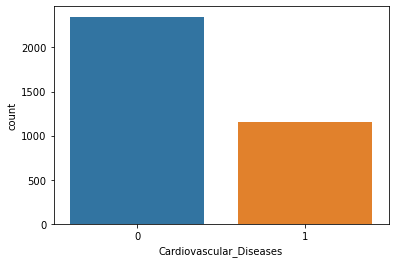

In [86]:
sns.countplot(x="Cardiovascular_Diseases", data=dataset)

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

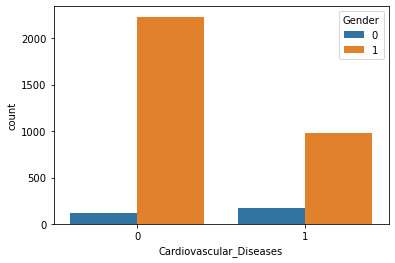

In [87]:
#How many of them were males and how many were females
sns.countplot(x="Cardiovascular_Diseases", hue="Gender", data=dataset)

In [88]:
#Where 0 stands for female and 1 stands for male

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

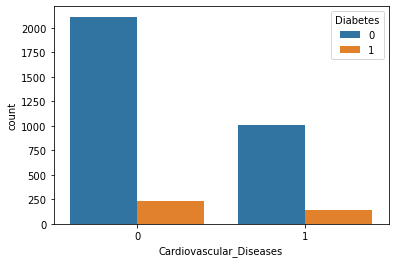

In [89]:
sns.countplot(x="Cardiovascular_Diseases", hue="Diabetes", data=dataset)

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

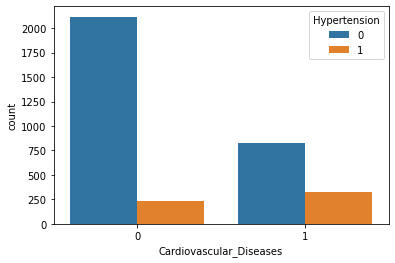

In [90]:
sns.countplot(x="Cardiovascular_Diseases", hue="Hypertension", data=dataset)

<AxesSubplot:xlabel='Cardiovascular_Diseases', ylabel='count'>

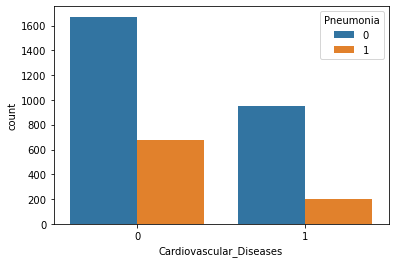

In [91]:
sns.countplot(x="Cardiovascular_Diseases", hue="Pneumonia", data=dataset)

<AxesSubplot:ylabel='Frequency'>

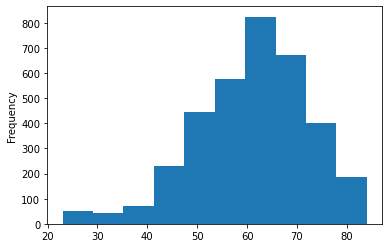

In [92]:
dataset["Age"].plot.hist()

In [93]:
#Analysis Done
#Now Data wrangling

<AxesSubplot:>

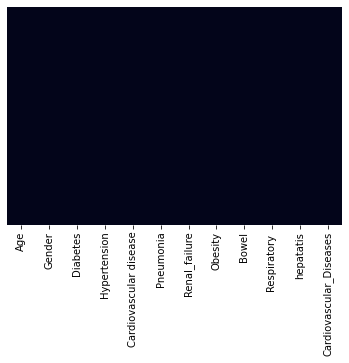

In [94]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

In [95]:
#Now training and testing dataset will be split

In [96]:
x=dataset.drop("Cardiovascular_Diseases",axis=1)
y=dataset["Cardiovascular_Diseases"]

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [99]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

In [100]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

In [101]:
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [102]:
predictions = logmodel.predict(x_test)

In [103]:
from sklearn.metrics import classification_report

In [104]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.74      0.93      0.82       694\n           1       0.72      0.37      0.49       356\n\n    accuracy                           0.74      1050\n   macro avg       0.73      0.65      0.65      1050\nweighted avg       0.73      0.74      0.71      1050\n'

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(y_test, predictions)

array([[642,  52],
       [225, 131]], dtype=int64)

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
accuracy_score(y_test, predictions)

0.7361904761904762

In [137]:
# Confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [3498, 8]

In [112]:
clf= LogisticRegression(max_iter=1000)
clf.fit(x_train, y_train);

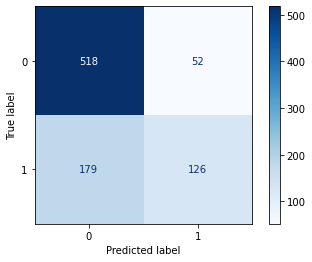

In [113]:
disp = plot_confusion_matrix(clf, x_test,y_test,cmap='Blues',values_format='.3g')

In [114]:
#Random Forest Classifer

In [115]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [133]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1
 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [116]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8708571428571429


In [117]:
#SVM

In [118]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [119]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7257142857142858


In [120]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [121]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.848


In [122]:
#CROSS VALIDATION OF RANDOM FOREST

In [130]:
# This code may not be run on GFG IDE 
# as required packages are not found. 
  
# importing cross-validation from sklearn package.
from sklearn import cross_validation
  
# value of K is 10.
data = cross_validation.KFold(len(train_set), n_folds=10, indices=False)

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\spekande\anaconda3\lib\site-packages\sklearn\__init__.py)